In [1]:
import cv2
import pathlib
import numpy as np

In [2]:
data_dir='./celebrity/cropped/'

In [3]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('celebrity/cropped')

In [4]:
celebrity_images_dict = {
    'messi': list(data_dir.glob('messi/*')),
    'virat': list(data_dir.glob('virat/*')),
    'mira_bai_chanu': list(data_dir.glob('mira_bai_chanu/*')),
    'pradeep_narwal': list(data_dir.glob('pradeep_narwal/*')),
}
celebritiess_labels_dict = {
    'mira_bai_chanu': 1,
    'messi': 2,
    'virat': 3,
    'pradeep_narwal': 4,
}

In [5]:
celebrity_images_dict['messi']

[WindowsPath('celebrity/cropped/messi/.ipynb_checkpoints'),
 WindowsPath('celebrity/cropped/messi/messi10.jpg'),
 WindowsPath('celebrity/cropped/messi/messi17.jpg'),
 WindowsPath('celebrity/cropped/messi/messi19.jpg'),
 WindowsPath('celebrity/cropped/messi/messi20.jpg'),
 WindowsPath('celebrity/cropped/messi/messi26 - Copy.jpg'),
 WindowsPath('celebrity/cropped/messi/messi26.jpg'),
 WindowsPath('celebrity/cropped/messi/messi31 - Copy.jpg'),
 WindowsPath('celebrity/cropped/messi/messi31.jpg'),
 WindowsPath('celebrity/cropped/messi/messi33 - Copy.jpg'),
 WindowsPath('celebrity/cropped/messi/messi33.jpg'),
 WindowsPath('celebrity/cropped/messi/messi4.jpg'),
 WindowsPath('celebrity/cropped/messi/messi50 - Copy.jpg'),
 WindowsPath('celebrity/cropped/messi/messi50.jpg'),
 WindowsPath('celebrity/cropped/messi/messi54 - Copy.jpg'),
 WindowsPath('celebrity/cropped/messi/messi54.jpg'),
 WindowsPath('celebrity/cropped/messi/messi57 - Copy.jpg'),
 WindowsPath('celebrity/cropped/messi/messi57.jpg')

In [6]:
import PIL.Image


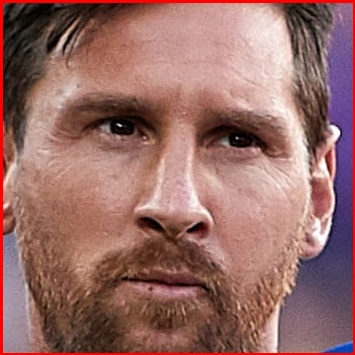

In [7]:
PIL.Image.open(celebrity_images_dict['messi'][5])

In [8]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [9]:
import matplotlib.pyplot as plt

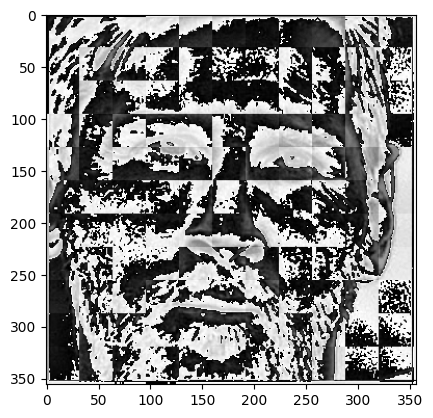

In [10]:
img=cv2.imread(str(celebrity_images_dict['messi'][5]))
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [11]:
x,y=[],[]
for celebrity_name,images in celebrity_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        if img is None:
            continue
        else:
            scalled_raw_img=cv2.resize(img,(32,32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            x.append(combined_img)
            y.append(celebritiess_labels_dict[celebrity_name])

In [23]:
import pandas as pd
df=pd.DataFrame(x[0])
df

,0
0,218
1,219
2,211
3,217
4,219
...,...
4091,8
4092,8
4093,7
4094,10


In [13]:
y[0]

2

In [25]:
X = np.array(x).reshape(len(x),4096).astype(float)
x=X/255

In [80]:
x_test[0]

array([0.00784314, 0.01568627, 0.96862745, ..., 0.88627451, 0.88627451,
       0.88235294])

In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,10,100,1000],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.857895,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.787895,{'n_estimators': 5}
2,logistic_regression,0.847895,{'C': 1}


In [45]:
best_estimators

{'svm': SVC(C=1, gamma='auto', kernel='linear', probability=True),
 'random_forest': RandomForestClassifier(n_estimators=5),
 'logistic_regression': LogisticRegression(C=1, solver='liblinear')}

scores = []
best_estimators = {}
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma='auto',probability=True)
clf = GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
scores.append({
                'model': algo,
                'best_score': clf.best_score_,
                'best_params': clf.best_params_
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model=[]
for algo, mp in model_params.items():
    model.append(mp['params'])
print(model)

In [47]:
best_estimators['svm'].score(x_test,y_test)

0.9411764705882353

In [49]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.9705882352941176

In [51]:
best_estimators['random_forest'].score(x_test,y_test)

0.8235294117647058

In [52]:
model=best_estimators['svm']

In [145]:
import pickle
# Save the model as a pickle in a file 
with open('saved_model.pickle', 'wb') as f:
    b = pickle.dump(model,f)